In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import os
import matplotlib.pyplot as plt
from pylab import rcParams

plt.style.use('ggplot')
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd()

'/home/yuichiro/Miniconda/Weather/GribToCSV/Visualization'

In [3]:
year="2019"
month="04"
day=15
time="000000"
duration=7
def getfile(year,month,day,time):
    file_name = "Weather_data/PV_result_forecast"+str(year+month+day+time)+".csv"    
    return file_name

In [4]:
print(os.path.isfile( getfile(year,month,str(day),time) ))
#input_data1 = input_data1[['DateTime','wind_10m[m/s]', 'temperature','Tc(the PV cell temperature)[°C]','Ppv(the output of the PV array)[Wh]']].set_index(['DateTime'])

True


In [5]:
def output_radiation(year,month,day,time,duration):
    input_data1 = pd.read_csv( getfile(year,month,str(day),time),encoding="SHIFT-JIS" )
    input_data1 = input_data1[['DateTime' ,'radiation']].set_index(['DateTime'])
    name1 = "radiation_"+str(year+month)+str(day)+str(time)
    input_data1 = input_data1.rename(columns={'radiation':name1})
    for i in range(1,duration):
        input_data2 = pd.read_csv( getfile(year,month,str(day+i),time),encoding="SHIFT-JIS" )
        input_data2 = input_data2[['DateTime', 'radiation']].set_index(['DateTime'])
        name2 = "radiation_"+str(year+month)+str(day+i)+str(time)
        input_data2 = input_data2.rename(columns={'radiation':name2})
        input_data1= pd.concat([input_data1,input_data2],axis=1,sort='False')
    return input_data1

output_radiation(year,month,day,time,duration)[:5]

,radiation_20190415000000,radiation_20190416000000,radiation_20190417000000,radiation_20190418000000,radiation_20190419000000,radiation_20190420000000,radiation_20190421000000
2019-04-15 09:00:00,573.353016,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15 10:00:00,798.701077,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15 11:00:00,930.433136,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15 12:00:00,962.830242,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15 13:00:00,916.667728,NaN,NaN,NaN,NaN,NaN,NaN


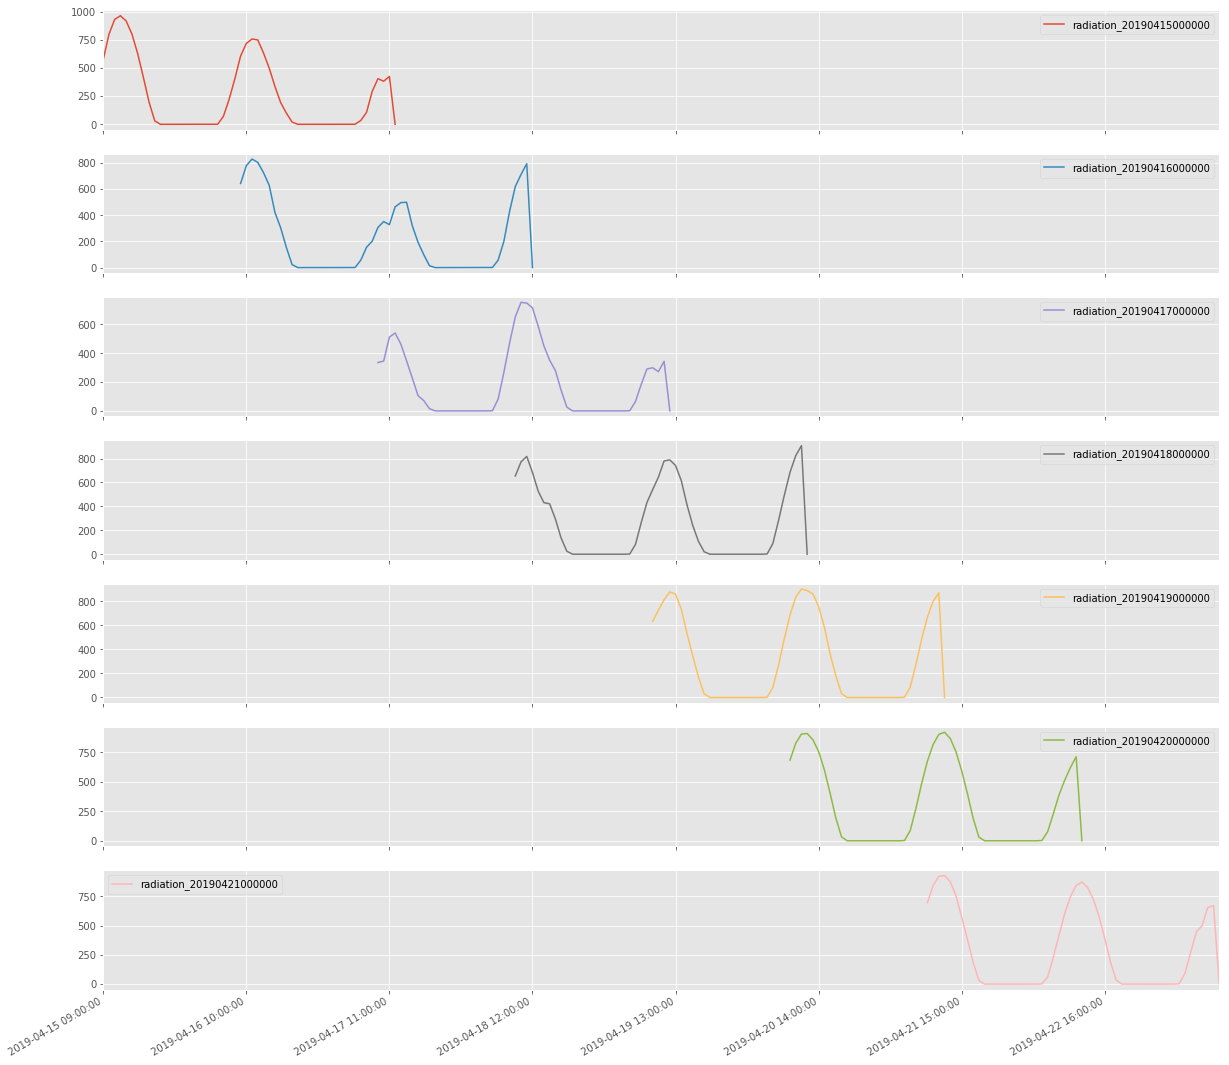

In [6]:
pd_rad = output_radiation(year,month,day,time,duration)


pd_rad.plot(subplots=True,figsize=(20,20))
plt.show()

In [7]:
#PV_result_realtime20190415000000.csv
real_rad = pd.read_csv("Weather_data/PV_result_realtime20190415000000.csv" ,encoding="SHIFT-JIS" )
real_rad = real_rad.rename(columns={'Radiation[W/m2]':'RealTime_radiation'})
real_rad = real_rad.rename(columns={'Time':'DateTime'})
real_rad =real_rad[['DateTime', 'RealTime_radiation']].set_index(['DateTime'])
real_rad[:3]

,RealTime_radiation
DateTime,
2019-04-15 00:00:00,0.0
2019-04-15 01:00:00,0.0
2019-04-15 02:00:00,0.0


In [8]:
pd_rad= pd.concat([real_rad,pd_rad],axis=1,sort='False')

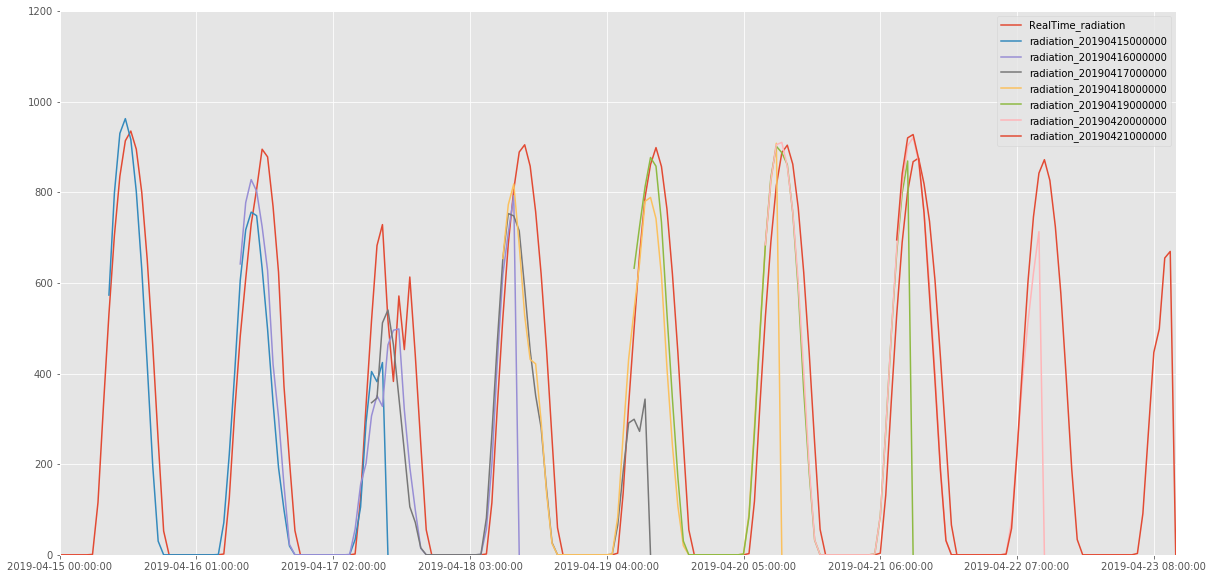

In [9]:
pd_rad.plot(figsize=(20,10),ylim=[0,1200])

plt.show()

In [10]:
pd_rad=pd_rad.reset_index()
pd_rad=pd_rad.rename(columns={'index':'Date'})

In [11]:
pd_rad.columns.values

array(['Date', 'RealTime_radiation', 'radiation_20190415000000',
       'radiation_20190416000000', 'radiation_20190417000000',
       'radiation_20190418000000', 'radiation_20190419000000',
       'radiation_20190420000000', 'radiation_20190421000000'],
      dtype=object)

In [12]:
output2 = pd_rad[['radiation_20190415000000',\
       'radiation_20190416000000', 'radiation_20190417000000',\
       'radiation_20190418000000', 'radiation_20190419000000',\
       'radiation_20190420000000', 'radiation_20190421000000']]

#pd_temp2=pd_temp
pd_rad_original=pd_rad
output3=output2

pd_rad_original

,Date,RealTime_radiation,radiation_20190415000000,radiation_20190416000000,radiation_20190417000000,radiation_20190418000000,radiation_20190419000000,radiation_20190420000000,radiation_20190421000000
0,2019-04-15 00:00:00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-15 01:00:00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-15 02:00:00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-15 03:00:00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-04-15 04:00:00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-04-15 05:00:00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-04-15 06:00:00,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-04-15 07:00:00,115.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-04-15 08:00:00,329.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-04-15 09:00:00,531.33,573.353016,NaN,NaN,NaN,NaN,NaN,NaN


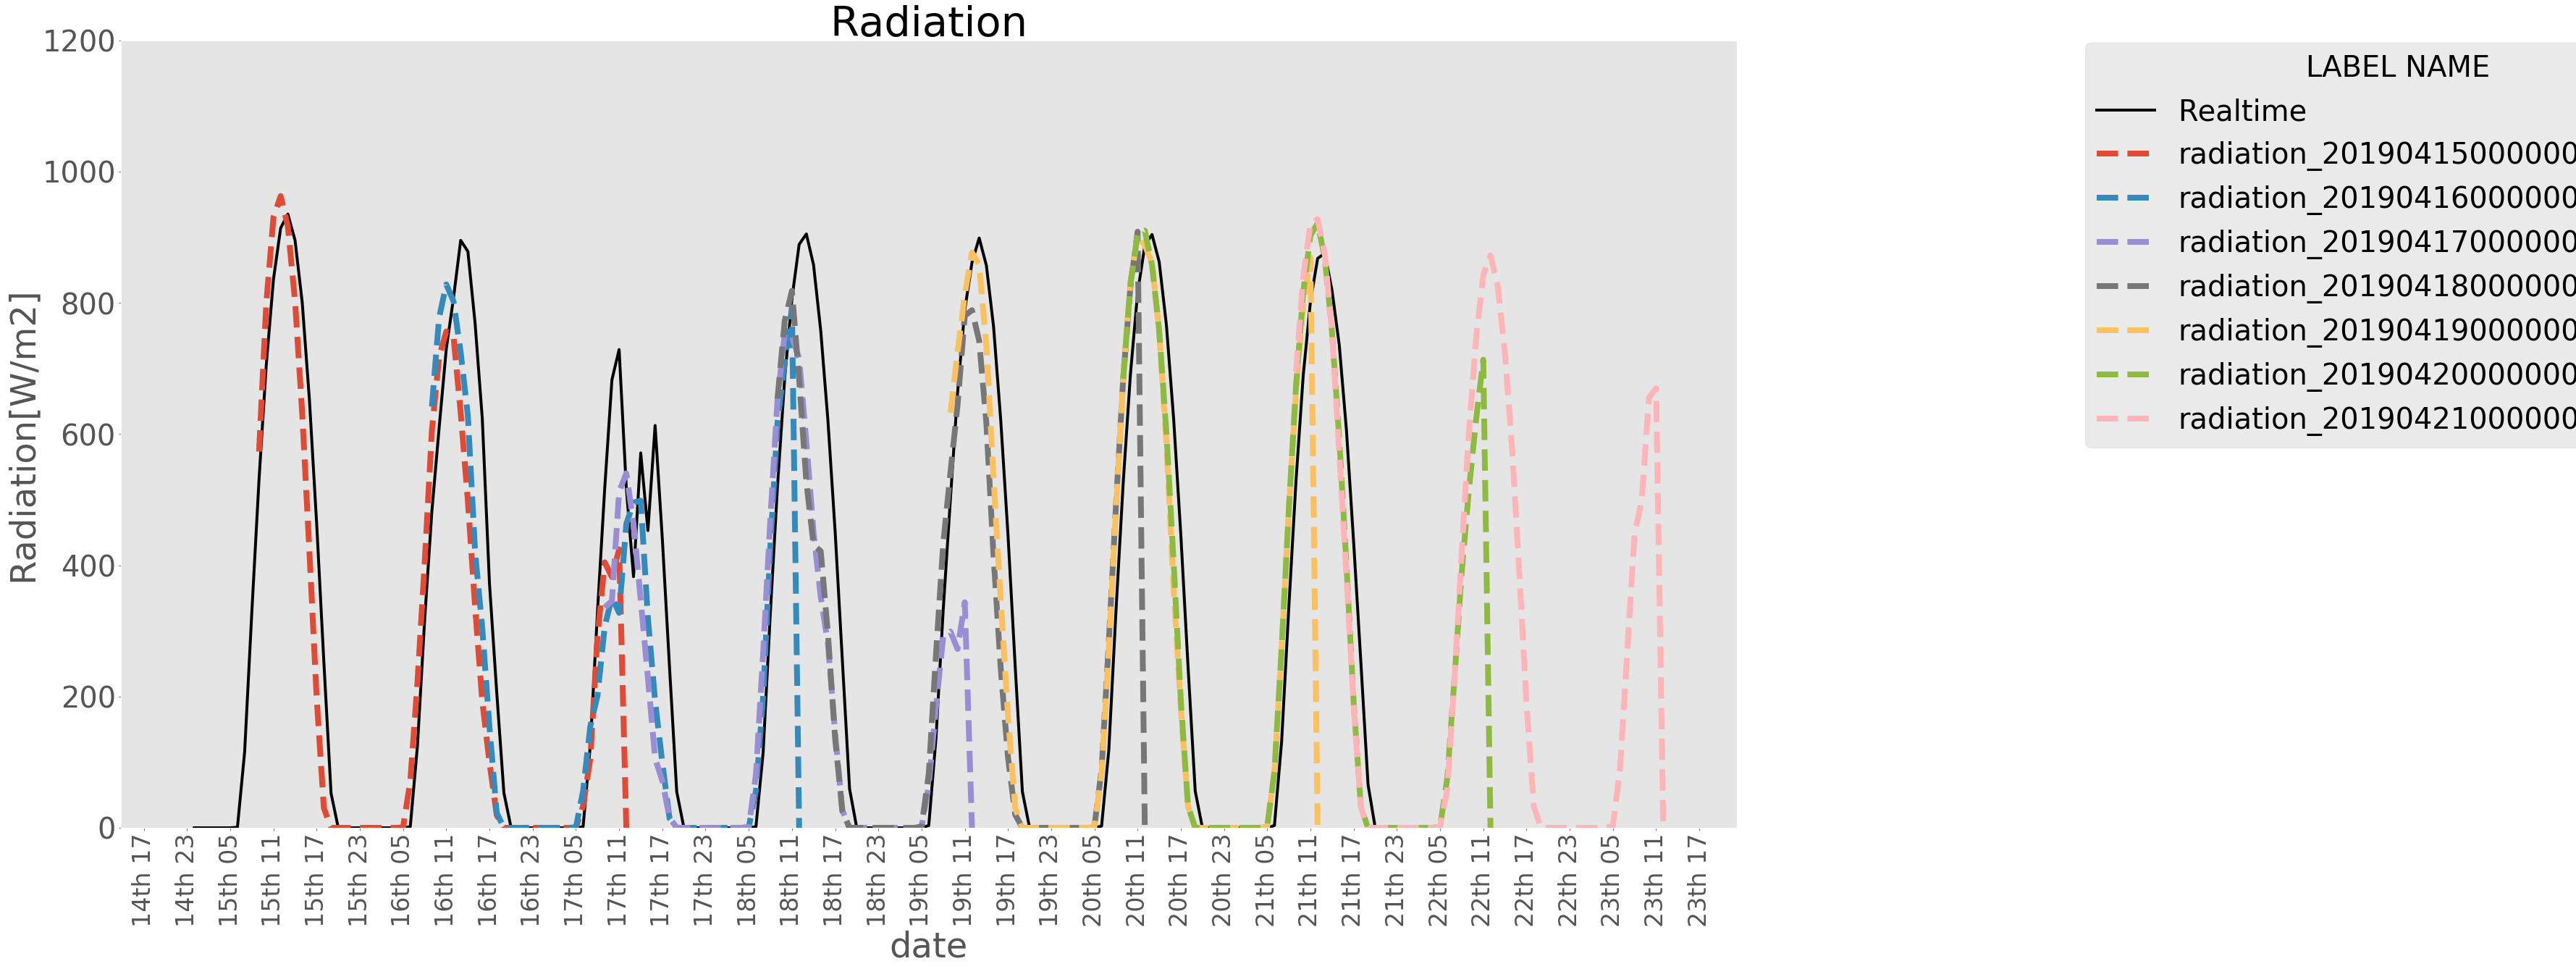

In [13]:
from matplotlib import cm, ticker
import matplotlib.dates as mdates
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

rcParams['figure.figsize'] = 40,20
plt.rcParams["font.size"] = 40


input1 = pd.to_datetime(pd_rad['Date'])
output1 = pd_rad['RealTime_radiation']

fig = plt.figure()
fig.set_tight_layout(False)
ax1 = fig.add_subplot(1,1,1)
ax1.plot(input1, output1, color='Black',linestyle='solid', linewidth = 4, label='Realtime')
ax1.set_ylim([0, 1200])

#output2
for column_name, item in output2.iteritems():
    ax1.plot(input1, item,linestyle='--', linewidth = 8, label=column_name)

ax1.set_title('Radiation')
ax1.set_xlabel('date')
ax1.set_ylabel('Radiation[W/m2]')
ax1.set_xticklabels(input1,rotation=0, size="small")

# 軸目盛の設定
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%dth %H"))

# 軸目盛ラベルの回転
labels = ax1.get_xticklabels()
plt.setp(labels, rotation=90);

# 凡例をまとめて出力する
fig.legend(loc="lower right",
           bbox_to_anchor=(1, 0.5, 0.3, .100), 
           borderaxespad=0.,
           ncol=1,
           mode="expand",
           title="LABEL NAME"
          ) 

ax1.grid(False) #目盛のごちゃごちゃ変更

In [14]:
from ipywidgets import interact

def figplot(select_day,size1,size2,fontsize,grid,y_range):
    rcParams['figure.figsize'] = size1,size2
    plt.rcParams["font.size"] = fontsize
    input1 = pd.to_datetime(pd_rad['Date'])
    output1 = pd_rad['RealTime_radiation']

    fig = plt.figure(figsize=(50,30),dpi=200)
    fig = plt.figure()
    fig.set_tight_layout(False)
    ax1 = fig.add_subplot(1,1,1)
    #ax1.patch.set_facecolor('white')
    ax1.plot(input1, output1, color='Black',linestyle='solid', linewidth = 6, label='Realtime')
    ax1.set_ylim([0, y_range])

    #output2
    for column_name, item in output2.iteritems():
        if column_name==select_day:
            ax1.plot(input1, item,linestyle='--', linewidth = 12, label=column_name)

    ax1.set_title('Radiation')
    ax1.set_xlabel('date')
    ax1.set_ylabel('Radiation[W/m2]')
    ax1.set_xticklabels(input1,rotation=0, size="small")

    # 軸目盛の設定
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=grid))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%dth %H"))
    
    plt.grid(which='major', color='black',linestyle='--')

    # 軸目盛ラベルの回転
    labels = ax1.get_xticklabels()
    plt.setp(labels, rotation=90);

    # 凡例をまとめて出力する
    fig.legend(loc="lower right",
               bbox_to_anchor=(1, 0.5, 0.3, .100), 
               borderaxespad=0.,
               ncol=1,
               mode="expand",
               title="LABEL NAME"
              ) 

    ax1.grid(True) #目盛のごちゃごちゃ変更

In [15]:
interact(figplot,select_day=['radiation_20190415000000',
       'radiation_20190416000000', 'radiation_20190417000000',
       'radiation_20190418000000', 'radiation_20190419000000',
       'radiation_20190420000000', 'radiation_20190421000000'],size1=(0,100, 1),size2=(0,50, 1),fontsize=(0,100,1),grid=(1,24,1),y_range=(1,2000,1))

interactive(children=(Dropdown(description='select_day', options=('radiation_20190415000000', 'radiation_20190…

<function __main__.figplot(select_day, size1, size2, fontsize, grid, y_range)>

In [16]:
#reference from https://pythondatascience.plavox.info/scikit-learn/%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%A9%95%E4%BE%A1
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

def figplot_dropna(select_day,size1,size2,fontsize,grid,y_range):
    rcParams['figure.figsize'] = size1,size2
    plt.rcParams["font.size"] = fontsize


    fig = plt.figure(figsize=(50,30),dpi=200)
    fig = plt.figure()
    fig.set_tight_layout(False)
    ax1 = fig.add_subplot(1,1,1)
    
    pd_rad2=pd_rad_original
    
    for column_name, item in output3.iteritems():
        if column_name==select_day:
            pd_rad3=pd.concat([pd_rad2['Date'],pd_rad2['RealTime_radiation'],item],axis=1).dropna()
            ax1.plot(pd_rad3['Date'], pd_rad3[column_name],linestyle='--', linewidth = 12, label=column_name)
            pred_list=pd_rad3[column_name].tolist()
            
    #ax1.patch.set_facecolor('white')
    ax1.plot(pd_rad3['Date'], pd_rad3['RealTime_radiation'], color='Black',linestyle='solid', linewidth = 6, label='Realtime')
    ax1.set_ylim([0, y_range])
    
    ax1.set_title('Radiation[W/m2]')
    ax1.set_xlabel('date')
    ax1.set_ylabel('Radiation[W/m2]')
    ax1.set_xticklabels(input1,rotation=0, size="small")

    # 軸目盛の設定
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(grid))
    plt.grid(which='major', color='black',linestyle='--')

    # 軸目盛ラベルの回転
    labels = ax1.get_xticklabels()
    plt.setp(labels, rotation=45);

    # 凡例をまとめて出力する
    fig.legend(loc="lower right",
               bbox_to_anchor=(1, 0.5, 0.4, .100), 
               borderaxespad=0.,
               ncol=1,
               mode="expand",
               title="LABEL NAME"
              ) 

    ax1.grid(True) #目盛のごちゃごちゃ変更
    print( 'MAE, Mean Absolute Error :', mean_absolute_error(pd_rad3['RealTime_radiation'].tolist(), pred_list ) )
    print( 'MSE, Mean Squared Error :', mean_squared_error(pd_rad3['RealTime_radiation'].tolist(), pred_list ) )
    print( 'RMSE: Root Mean Squared Error :', np.sqrt(mean_squared_error(pd_rad3['RealTime_radiation'].tolist(), pred_list )) )
    print( 'R2, R-squared, coefficient of determination :', r2_score(pd_rad3['RealTime_radiation'].tolist(), pred_list ) )
    print( 'explained_variance_score :', explained_variance_score(pd_rad3['RealTime_radiation'].tolist(), pred_list ) )
    

In [17]:
interact(figplot_dropna,select_day=['radiation_20190415000000',
       'radiation_20190416000000', 'radiation_20190417000000',
       'radiation_20190418000000', 'radiation_20190419000000',
       'radiation_20190420000000', 'radiation_20190421000000'],size1=(0,100, 1),size2=(0,50, 1),fontsize=(0,100,1),grid=(1,24,1),y_range=(1,2000,1))

interactive(children=(Dropdown(description='select_day', options=('radiation_20190415000000', 'radiation_20190…

<function __main__.figplot_dropna(select_day, size1, size2, fontsize, grid, y_range)>